# Hello World
Some Document About Code

In [19]:
# import libraries
import json
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore') # will block warning from appearing, remove if want to see warnings

In [20]:
# Question 1.2

# load goemotions.json into data
with open("goemotions.json") as f:
    data = json.load(f)

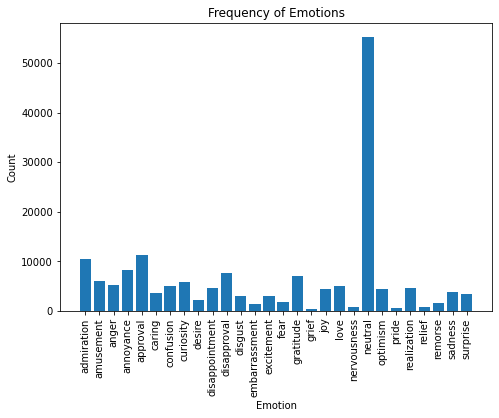

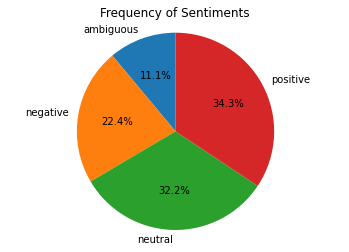

In [21]:
# Question 1.3

# create arrays for emotions and sentiments
bignumpy = np.asarray(data)
allemotions = bignumpy[:,1]
allsentiments = bignumpy[:,2]

# count the frequencies of all emotions and display in bar graph
emotions, counts = np.unique(allemotions, return_counts=True)
fig_bar = plt.figure()
ax1 = fig_bar.add_axes([0,0,1,1])
ax1.bar(emotions,counts)
plt.xticks(rotation=90)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Frequency of Emotions')
plt.show()
fig_bar.savefig('emotions-hist.pdf', bbox_inches='tight')

# count the frequencies of all sentiments and display in pie chart
sentiments, counts = np.unique(allsentiments, return_counts=True)
fig_pie = plt.figure()
plt.pie(counts, labels=sentiments, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Frequency of Sentiments')
plt.show()
fig_pie.savefig('sentiments-pie.pdf', bbox_inches='tight')

In [22]:
# Question 2.1
corpus = bignumpy[:,0]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print("Number of tokens (size of vocabulary) =", len(vectorizer.get_feature_names_out()),"unique words\n")
# print(X.toarray())


# ----------Might remove this section------------
y = vectorizer.fit_transform(allemotions)
print("Emotions from original dataset numbered from 0 to 27 (refer to the bar graph 'Frequency of Emotions' for the order)")
print(y.nonzero()[1])
y_emo = y.nonzero()[1]

y = vectorizer.fit_transform(allsentiments)
print("\nSentiments from original dataset numbered from 0 to 3 with 0=ambiguous, 1=negative, 2=neutral and 3=positive")
print(y.nonzero()[1])
y_sent = y.nonzero()[1]

Number of tokens (size of vocabulary) = 30449 unique words

Emotions from original dataset numbered from 0 to 27 (refer to the bar graph 'Frequency of Emotions' for the order)
[26 20 18 ...  5  0  2]

Sentiments from original dataset numbered from 0 to 3 with 0=ambiguous, 1=negative, 2=neutral and 3=positive
[1 2 3 ... 3 3 1]


In [23]:
# Question 2.2

# Splitting training and test sets for both emotions and sentiments
X_emo_train, X_emo_test, y_emo_train, y_emo_test = train_test_split(X, y_emo, test_size=0.2, random_state=0)
X_sent_train, X_sent_test, y_sent_train, y_sent_test = train_test_split(X, y_sent, test_size=0.2, random_state=0)


# ----------------- Might remove this section -------------------
# Reddit post words
print("Size of training data set X: ") # there is no need to print the dataset for question 2.2 to be removed in final
print(X_emo_train.shape)               # version for submission
print("Size of testing data set X: ")
print(X_emo_test.shape)

# Emotions
print("Size of training data set for emotions, y: ")
print(y_emo_train.shape)

print("Size of testing data set for emotions, y: ")
print(y_emo_test.shape)

# Sentiment
print("Size of training data set for sentiment, y: ")
print(y_sent_train.shape)

print("Size of testing data set for sentiment, y: ")
print(y_sent_test.shape)

# mymessagetest = "I am so happy to be here! let's go!"

Size of training data set X: 
(137456, 30449)
Size of testing data set X: 
(34364, 30449)
Size of training data set for emotions, y: 
(137456,)
Size of testing data set for emotions, y: 
(34364,)
Size of training data set for sentiment, y: 
(137456,)
Size of testing data set for sentiment, y: 
(34364,)


In [6]:
# Question 2.3.1 - Naive Bayes

# Emotions
mnbclf = MultinomialNB()
mnbclf.fit(X_emo_train, y_emo_train)

# Obtaining the prediction based on the model
y_emo_pred = mnbclf.predict(X_emo_test)

# Sentiment
mnbclf.fit(X_sent_train, y_sent_train)

# Obtaining the prediction based on the model
y_sent_pred = mnbclf.predict(X_sent_test)

# Write to performance.txt file
with open('performance.txt', 'w') as f:
    f.write('Multinomial Naive Bayes Classifier - Default Parameters - Emotions\n\n\n')
    f.write('Confusion Matrix: \n\n')
    f.write(str(confusion_matrix(y_emo_test, y_emo_pred)))
    f.write('\n\nClassification Report: \n\n')
    f.write(classification_report(y_emo_test, y_emo_pred))
    f.write('\n\n\nMultinomial Naive Bayes Classifier - Default Parameters - Sentiments\n\n\n')
    f.write('Confusion Matrix: \n\n')
    f.write(str(confusion_matrix(y_sent_test, y_sent_pred)))
    f.write('\n\nClassification Report: \n\n')
    f.write(classification_report(y_sent_test, y_sent_pred))
    f.write('\n\n\n')

print("Emotions classification report:\n")
print(classification_report(y_emo_test, y_emo_pred))

print("\nSentiments classification report:\n")
print(classification_report(y_sent_test, y_sent_pred))

Emotions classification report:

              precision    recall  f1-score   support

           0       0.49      0.45      0.47      2134
           1       0.51      0.27      0.35      1233
           2       0.35      0.12      0.18      1062
           3       0.18      0.06      0.09      1688
           4       0.25      0.10      0.14      2226
           5       0.24      0.05      0.08       669
           6       0.33      0.06      0.10       965
           7       0.37      0.11      0.17      1143
           8       0.29      0.02      0.03       439
           9       0.25      0.04      0.07       970
          10       0.24      0.07      0.11      1537
          11       0.44      0.09      0.15       585
          12       0.25      0.01      0.01       303
          13       0.28      0.03      0.05       597
          14       0.20      0.02      0.03       317
          15       0.74      0.68      0.71      1409
          16       0.00      0.00      0.00     

In [7]:
# Question 2.3.2 - Decision Tree

# Emotions
dtclf=DecisionTreeClassifier()
dtclf.fit(X_emo_train, y_emo_train)

# Obtaining the prediction based on the model
y_emo_pred = dtclf.predict(X_emo_test)

# Sentiment
dtclf.fit(X_sent_train, y_sent_train)

# Obtaining the prediction based on the model
y_sent_pred = dtclf.predict(X_sent_test)

print("Emotions classification report:\n")
print(classification_report(y_emo_test, y_emo_pred))

print("\nSentiments classification report:\n")
print(classification_report(y_sent_test, y_sent_pred))

# Write to performance.txt
with open('performance.txt', 'a') as f:
    f.write('Decision Tree Classifier - Default Parameters - Emotions\n\n\n')
    f.write('Confusion Matrix: \n\n')
    f.write(str(confusion_matrix(y_emo_test, y_emo_pred)))
    f.write('\n\nClassification Report: \n\n')
    f.write(classification_report(y_emo_test, y_emo_pred))
    f.write('\n\n\nMultinomial Naive Bayes Classifier - Default Parameters - Sentiments\n\n\n')
    f.write('Confusion Matrix: \n\n')
    f.write(str(confusion_matrix(y_sent_test, y_sent_pred)))
    f.write('\n\nClassification Report: \n\n')
    f.write(classification_report(y_sent_test, y_sent_pred))
    f.write('\n\n\n')

Emotions classification report:

              precision    recall  f1-score   support

           0       0.40      0.56      0.47      2134
           1       0.42      0.57      0.48      1233
           2       0.24      0.36      0.29      1062
           3       0.16      0.22      0.18      1688
           4       0.21      0.28      0.24      2226
           5       0.19      0.24      0.21       669
           6       0.23      0.30      0.27       965
           7       0.31      0.34      0.33      1143
           8       0.24      0.28      0.26       439
           9       0.16      0.18      0.17       970
          10       0.25      0.24      0.24      1537
          11       0.25      0.22      0.23       585
          12       0.20      0.15      0.17       303
          13       0.20      0.19      0.20       597
          14       0.33      0.39      0.36       317
          15       0.74      0.74      0.74      1409
          16       0.09      0.09      0.09     

In [8]:
# Question 2.3.3 - Multi-Layered Perceptron

# Setting parameters
mlpclf = MLPClassifier(max_iter=1)
mlpclf.fit(X_emo_train, y_emo_train)

# Obtaining the prediction based on the model for emotions
y_emo_pred = mlpclf.predict(X_emo_test)
print("Emotions classification report:\n")
print(classification_report(y_emo_test, y_emo_pred))

# Obtaining the prediction based on the model for sentiments
mlpclf.fit(X_sent_train, y_sent_train)
y_sent_pred = mlpclf.predict(X_sent_test)

print("\nSentiments classification report:\n")
print(classification_report(y_sent_test, y_sent_pred))

# Write to performance.txt
with open('performance.txt', 'a') as f:
    f.write('Multi-Layered Perceptron Classifier - Default Parameters (max_iter=1 to reduce execution time) - Emotions\n\n\n')
    f.write('Confusion Matrix: \n\n')
    f.write(str(confusion_matrix(y_emo_test, y_emo_pred)))
    f.write('\n\nClassification Report: \n\n')
    f.write(classification_report(y_emo_test, y_emo_pred))
    f.write('\n\n\nMultinomial Naive Bayes Classifier - Default Parameters - Sentiments\n\n\n')
    f.write('Confusion Matrix: \n\n')
    f.write(str(confusion_matrix(y_sent_test, y_sent_pred)))
    f.write('\n\nClassification Report: \n\n')
    f.write(classification_report(y_sent_test, y_sent_pred))
    f.write('\n\n\n')

Emotions classification report:

              precision    recall  f1-score   support

           0       0.53      0.51      0.52      2134
           1       0.53      0.57      0.55      1233
           2       0.38      0.23      0.29      1062
           3       0.24      0.05      0.08      1688
           4       0.38      0.08      0.13      2226
           5       0.30      0.08      0.13       669
           6       0.39      0.07      0.13       965
           7       0.40      0.12      0.19      1143
           8       0.45      0.19      0.27       439
           9       0.22      0.03      0.05       970
          10       0.22      0.06      0.10      1537
          11       0.47      0.18      0.26       585
          12       0.25      0.00      0.01       303
          13       0.53      0.07      0.12       597
          14       0.51      0.33      0.40       317
          15       0.76      0.78      0.77      1409
          16       0.00      0.00      0.00     

In [9]:
# Question 2.3.4 - Top-MNB
param = {'alpha':[0,0.1,0.5,2]}
topMNBclf = GridSearchCV(MultinomialNB(), param_grid=param)

# For emotions
topMNBclf.fit(X_emo_train, y_emo_train)
y_emo_pred = topMNBclf.predict(X_emo_test)
print('Emotions best parameters : {}'.format(topMNBclf.best_params_))
print("\nEmotions classification report using the best parameters:\n")
print(classification_report(y_emo_test, y_emo_pred))

# Write to performance.txt
with open('performance.txt', 'a') as f:
    f.write('Top Multinomial Naive Bayes Classifier - Parameters: {}'.format(topMNBclf.best_params_))
    f.write(' - Emotions\n\n\n')
    f.write('Confusion Matrix: \n\n')
    f.write(str(confusion_matrix(y_emo_test, y_emo_pred)))
    f.write('\n\nClassification Report: \n\n')
    f.write(classification_report(y_emo_test, y_emo_pred))

# For sentiment
topMNBclf.fit(X_sent_train, y_sent_train)
y_sent_pred = topMNBclf.predict(X_sent_test)
print('\nSentiments best parameters : {}'.format(topMNBclf.best_params_))
print("\nSentiments classification report using the best parameters:\n")
print(classification_report(y_sent_test, y_sent_pred))

# Write to performance.txt
with open('performance.txt', 'a') as f:
    f.write('\n\n\nTop Multinomial Naive Bayes Classifier - Parameters: {}'.format(topMNBclf.best_params_))
    f.write(' - Sentiments\n\n\n')
    f.write('Confusion Matrix: \n\n')
    f.write(str(confusion_matrix(y_sent_test, y_sent_pred)))
    f.write('\n\nClassification Report: \n\n')
    f.write(classification_report(y_sent_test, y_sent_pred))
    f.write('\n\n\n')

Emotions best parameters : {'alpha': 0.5}

Emotions classification report using the best parameters:

              precision    recall  f1-score   support

           0       0.47      0.51      0.49      2134
           1       0.49      0.41      0.45      1233
           2       0.32      0.19      0.24      1062
           3       0.18      0.10      0.12      1688
           4       0.24      0.13      0.17      2226
           5       0.20      0.13      0.16       669
           6       0.28      0.13      0.18       965
           7       0.33      0.18      0.23      1143
           8       0.35      0.10      0.15       439
           9       0.22      0.08      0.12       970
          10       0.24      0.14      0.18      1537
          11       0.38      0.16      0.23       585
          12       0.31      0.03      0.06       303
          13       0.26      0.07      0.11       597
          14       0.41      0.16      0.23       317
          15       0.69      0.75

In [10]:
# Question 2.3.5 - Top-DT

# Setting parameters
param = {'criterion':('gini','entropy'), 'max_depth':[4, 6], 'min_samples_split':[2, 4, 6]}
topDTclf = GridSearchCV(DecisionTreeClassifier(), param)

# Emotions
topDTclf.fit(X_emo_train, y_emo_train)
y_emo_pred = topDTclf.predict(X_emo_test)
print('Emotions best parameters : {}'.format(topDTclf.best_params_))
print("\nEmotions classification report using the best parameters:\n")
print(classification_report(y_emo_test, y_emo_pred))

# Write to performance.txt
with open('performance.txt', 'a') as f:
    f.write('Top Decision Tree Classifier - Parameters: {}'.format(topDTclf.best_params_))    
    f.write(' - Emotions\n\n\n')
    f.write('Confusion Matrix: \n\n')
    f.write(str(confusion_matrix(y_emo_test, y_emo_pred)))
    f.write('\n\nClassification Report: \n\n')
    f.write(classification_report(y_emo_test, y_emo_pred))

# Sentiments
topDTclf.fit(X_sent_train, y_sent_train)
y_sent_pred = topDTclf.predict(X_sent_test)
print('Sentiment best parameters : {}'.format(topDTclf.best_params_))
print("\nSentiment classification report using the best parameters:\n")
print(classification_report(y_sent_test, y_sent_pred))

# Write to performance.txt
with open('performance.txt', 'a') as f:
    f.write('\n\n\nTop Decision Tree Classifier - Parameters: {}'.format(topDTclf.best_params_))    
    f.write(' - Sentiments\n\n\n')
    f.write('Confusion Matrix: \n\n')
    f.write(str(confusion_matrix(y_sent_test, y_sent_pred)))
    f.write('\n\nClassification Report: \n\n')
    f.write(classification_report(y_sent_test, y_sent_pred))
    f.write('\n\n\n')

Emotions best parameters : {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 6}

Emotions classification report using the best parameters:

              precision    recall  f1-score   support

           0       0.52      0.11      0.18      2134
           1       0.56      0.31      0.40      1233
           2       0.00      0.00      0.00      1062
           3       0.00      0.00      0.00      1688
           4       0.00      0.00      0.00      2226
           5       0.00      0.00      0.00       669
           6       0.00      0.00      0.00       965
           7       0.00      0.00      0.00      1143
           8       0.00      0.00      0.00       439
           9       0.50      0.00      0.00       970
          10       0.00      0.00      0.00      1537
          11       0.00      0.00      0.00       585
          12       0.00      0.00      0.00       303
          13       0.00      0.00      0.00       597
          14       0.00      0.00      0

In [12]:
# Question 2.3.6 - Top-MultiLayered Perceptron

# Setting parameters

param = {'max_iter': [1], 
         'activation': ('identity', 'logistic', 'tanh', 'relu'), 
         'hidden_layer_sizes': [(30,50),(10,10,10)],
         'solver': ('adam', 'sgd')}
topMLPclf = GridSearchCV(MLPClassifier(), param)

# Emotions
topMLPclf.fit(X_emo_train, y_emo_train)
y_emo_pred = topMLPclf.predict(X_emo_test)
print('Emotions best parameters : {}'.format(topMLPclf.best_params_))
print("\nEmotions classification report using the best parameters:\n")
print(classification_report(y_emo_test, y_emo_pred))

# Write to performance.txt
with open('performance.txt', 'a') as f:
    f.write('Top Multi-Layered Perceptron Classifier - Parameters: {}'.format(topMLPclf.best_params_))    
    f.write(' - Emotions\n\n\n')
    f.write('Confusion Matrix: \n\n')
    f.write(str(confusion_matrix(y_emo_test, y_emo_pred)))
    f.write('\n\nClassification Report: \n\n')
    f.write(classification_report(y_emo_test, y_emo_pred))

# Sentiments
topMLPclf.fit(X_sent_train, y_sent_train)
y_sent_pred = topMLPclf.predict(X_sent_test)
print('Sentiment best parameters : {}'.format(topMLPclf.best_params_))
print("\nSentiment classification report using the best parameters:\n")
print(classification_report(y_sent_test, y_sent_pred))

# Write to performance.txt
with open('performance.txt', 'a') as f:
    f.write('\n\n\nTop Multi_Layered Perceptron Classifier - Parameters: {}'.format(topMLPclf.best_params_))    
    f.write(' - Sentiments\n\n\n')
    f.write('Confusion Matrix: \n\n')
    f.write(str(confusion_matrix(y_sent_test, y_sent_pred)))
    f.write('\n\nClassification Report: \n\n')
    f.write(classification_report(y_sent_test, y_sent_pred))
    f.write('\n\n\n')


Emotions best parameters : {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'max_iter': 1, 'solver': 'adam'}

Emotions classification report using the best parameters:

              precision    recall  f1-score   support

           0       0.51      0.56      0.53      2134
           1       0.53      0.58      0.55      1233
           2       0.38      0.21      0.27      1062
           3       0.24      0.02      0.04      1688
           4       0.45      0.05      0.08      2226
           5       0.34      0.06      0.11       669
           6       0.35      0.05      0.08       965
           7       0.40      0.11      0.17      1143
           8       0.46      0.18      0.26       439
           9       0.28      0.01      0.01       970
          10       0.19      0.03      0.05      1537
          11       0.59      0.14      0.22       585
          12       1.00      0.00      0.01       303
          13       0.60      0.04      0.08       597
          14  

In [13]:
# More import - could put at top with others
import nltk
import gensim
import gensim.downloader as api
from gensim.models import Word2Vec

In [14]:
# Question 3.1
wv = api.load('word2vec-google-news-300')


In [51]:
# test for Question 3.2
tokens = []
count_1 = 0
count_2 = 0
count_3 = 0
count_4 = 0
count_5 = 0

for word in corpus:
    tokens.append(nltk.word_tokenize(word))

X_emo_train, X_emo_test, y_emo_train, y_emo_test = train_test_split(tokens, y_emo, test_size=0.2, random_state=0)
X_sent_train, X_sent_test, y_sent_train, y_sent_test = train_test_split(tokens, y_sent, test_size=0.2, random_state=2)

for token in X_emo_train:
    count_1 = count_1 + len(token)
    
for token in X_emo_test:
    count_2 = count_2 + len(token)
    
for token in X_sent_train:
    count_4 = count_4 + len(token)
    
for token in X_sent_test:
    count_5 = count_5 + len(token)
    
for token in tokens:
    count_3 = count_3 + len(token)
    
    
print("Total number of tokens for the corpus train:",count_1)
print("Total number of tokens for the corpus test: ",count_2)
print("Total number of tokens for the total corpus: ",count_3)

Total number of tokens for the corpus train: 2112422
Total number of tokens for the corpus test:  529706
Total number of tokens for the total corpus:  2642128


In [52]:
# Question 3.3 & 3.4 - Average of embedening words

# For Emotion train
X_average_emo_train = []
y_emo_average_train = []
count_hit_rates = 0
count_missed_rates = 0

for j in range(len(X_emo_train)):
    count_average = 0
    vec_sum = 0
    for i in range(len(X_emo_train[j])):
        try:
            vec_sum = wv[X_emo_train[j][i]] + vec_sum
            count_hit_rates = count_hit_rates + 1
            count_average = count_average + 1 
            # print(vec_cameroon_sum[0])
            # print(i)
            # print(f"{vec_cameroon}\n\n\n")
        except KeyError:
            count_missed_rates = count_missed_rates + 1
            # print(f"The word {tokens[j][i]} does not appear in this model")
    if count_average != 0:
        X_average_emo_train.append(vec_sum / count_average)
        y_emo_average_train.append(y_emo_train[j])

# print(f"\n\n\n{average}")
# print(count_average)

#print(average[0])
#print(len(average))
#print(count_hit_rates)
#print(count_missed_rates)
#print(len(y_average))
print(f"{count_1} = {count_missed_rates + count_hit_rates}")
print(f"overall hit rate of emotion training = {count_hit_rates/(count_missed_rates + count_hit_rates)*100} %")


# For emotion test

X_average_emo_test = []
y_emo_average_test = []
count_hit_rates = 0
count_missed_rates = 0

for j in range(len(X_emo_test)):
    count_average = 0
    vec_sum = 0
    for i in range(len(X_emo_test[j])):
        try:
            vec_sum = wv[X_emo_test[j][i]] + vec_sum
            count_hit_rates = count_hit_rates + 1
            count_average = count_average + 1 
        except KeyError:
            count_missed_rates = count_missed_rates + 1
    if count_average != 0:
        X_average_emo_test.append(vec_sum / count_average)
        y_emo_average_test.append(y_emo_test[j])


print(f"{count_2} = {count_missed_rates + count_hit_rates}")
print(f"overall hit rate of emotion testing = {count_hit_rates/(count_missed_rates + count_hit_rates)*100} %")

# For sentiments
# For sentiment train
X_average_sent_train = []
y_sent_average_train = []
count_hit_rates = 0
count_missed_rates = 0

for j in range(len(X_sent_train)):
    count_average = 0
    vec_sum = 0
    for i in range(len(X_sent_train[j])):
        try:
            vec_sum = wv[X_sent_train[j][i]] + vec_sum
            count_hit_rates = count_hit_rates + 1
            count_average = count_average + 1 
        except KeyError:
            count_missed_rates = count_missed_rates + 1
    if count_average != 0:
        X_average_sent_train.append(vec_sum / count_average)
        y_sent_average_train.append(y_sent_train[j])

print(f"{count_4} = {count_missed_rates + count_hit_rates}")
print("overall hit rate of sentiment training = ",(count_hit_rates/(count_missed_rates + count_hit_rates))*100, " %")

# For sentiment test

X_average_sent_test = []
y_sent_average_test = []
count_hit_rates = 0
count_missed_rates = 0

for j in range(len(X_sent_test)):
    count_average = 0
    vec_sum = 0
    for i in range(len(X_sent_test[j])):
        try:
            vec_sum = wv[X_sent_test[j][i]] + vec_sum
            count_hit_rates = count_hit_rates + 1
            count_average = count_average + 1 
        except KeyError:
            count_missed_rates = count_missed_rates + 1
    if count_average != 0:
        X_average_sent_test.append(vec_sum / count_average)
        y_sent_average_test.append(y_sent_test[j])


print(f"{count_5} = {count_missed_rates + count_hit_rates}")
print(f"overall hit rate of sentiment testing = {count_hit_rates/(count_missed_rates + count_hit_rates)*100} %")

2112422 = 2112422
overall hit rate of emotion training = 77.43935634073115 %
529706 = 529706
overall hit rate of emotion testing = 77.49562965116499 %
2112746 = 2112746
overall hit rate of sentiment training =  77.45720498346701  %
529382 = 529382
overall hit rate of sentiment testing = 77.42443075132891 %


In [57]:
# Question 3.5 & part of 3.7

# Setting parameters
mlpclf = MLPClassifier(max_iter=1)
mlpclf.fit(X_average_emo_train, y_emo_average_train)

# Obtaining the prediction based on the model for emotions
y_emo_pred = mlpclf.predict(X_average_emo_test)
print("Emotions classification report:\n")
print(classification_report(y_emo_average_test, y_emo_pred))

# Obtaining the prediction based on the model for sentiments
mlpclf.fit(X_average_sent_train, y_sent_average_train)
y_sent_pred = mlpclf.predict(X_average_sent_test)

print("\nSentiments classification report:\n")
print(classification_report(y_sent_average_test, y_sent_pred))


Emotions classification report:

              precision    recall  f1-score   support

           0       0.50      0.46      0.48      2134
           1       0.49      0.41      0.45      1232
           2       0.43      0.16      0.24      1060
           3       0.26      0.04      0.07      1688
           4       0.35      0.05      0.09      2226
           5       0.31      0.13      0.18       669
           6       0.45      0.05      0.09       965
           7       0.42      0.09      0.15      1142
           8       0.46      0.16      0.24       439
           9       0.30      0.03      0.05       970
          10       0.31      0.05      0.09      1537
          11       0.35      0.18      0.24       585
          12       0.43      0.05      0.09       303
          13       0.35      0.07      0.12       597
          14       0.44      0.23      0.30       317
          15       0.80      0.73      0.76      1409
          16       0.33      0.03      0.06     

In [58]:
# Question 3.6 & 3.7
param = {'max_iter': [1], 
         'activation': ('identity', 'logistic', 'tanh', 'relu'), 
         'hidden_layer_sizes': [(30,50),(10,10,10)],
         'solver': ('adam', 'sgd')}
topMLPclf = GridSearchCV(MLPClassifier(), param)

# Emotions
topMLPclf.fit(X_average_emo_train, y_emo_average_train)
y_emo_pred = topMLPclf.predict(X_average_emo_test)
print('Emotions best parameters : {}'.format(topMLPclf.best_params_))
print("\nEmotions classification report using the best parameters:\n")
print(classification_report(y_emo_average_test, y_emo_pred))

# Write to performance.txt
with open('performance.txt', 'a') as f:
    f.write('Top Multi-Layered Perceptron Classifier - Parameters: {}'.format(topMLPclf.best_params_))    
    f.write(' - Emotions\n\n\n')
    f.write('Confusion Matrix: \n\n')
    f.write(str(confusion_matrix(y_emo_average_test, y_emo_pred)))
    f.write('\n\nClassification Report: \n\n')
    f.write(classification_report(y_emo_average_test, y_emo_pred))

# Sentiments
topMLPclf.fit(X_average_sent_train, y_sent_average_train)
y_sent_pred = topMLPclf.predict(X_average_sent_test)
print('Sentiment best parameters : {}'.format(topMLPclf.best_params_))
print("\nSentiment classification report using the best parameters:\n")
print(classification_report(y_sent_average_test, y_sent_pred))

# Write to performance.txt
with open('performance.txt', 'a') as f:
    f.write('\n\n\nTop Multi_Layered Perceptron Classifier - Parameters: {}'.format(topMLPclf.best_params_))    
    f.write(' - Sentiments\n\n\n')
    f.write('Confusion Matrix: \n\n')
    f.write(str(confusion_matrix(y_sent_average_test, y_sent_pred)))
    f.write('\n\nClassification Report: \n\n')
    f.write(classification_report(y_sent_average_test, y_sent_pred))
    f.write('\n\n\n')

Emotions best parameters : {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'max_iter': 1, 'solver': 'adam'}

Emotions classification report using the best parameters:

              precision    recall  f1-score   support

           0       0.49      0.37      0.42      2134
           1       0.34      0.15      0.21      1232
           2       0.28      0.11      0.15      1060
           3       0.15      0.01      0.01      1688
           4       0.57      0.00      0.00      2226
           5       0.14      0.00      0.00       669
           6       0.20      0.00      0.00       965
           7       0.30      0.01      0.02      1142
           8       0.50      0.00      0.00       439
           9       0.00      0.00      0.00       970
          10       0.24      0.01      0.01      1537
          11       0.23      0.03      0.06       585
          12       0.00      0.00      0.00       303
          13       0.00      0.00      0.00       597
          14  